In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import display
import ipywidgets as widgets

Saving IMG_20231101_154044.jpg to IMG_20231101_154044.jpg
Saving IMG_20231103_221629.jpg to IMG_20231103_221629.jpg


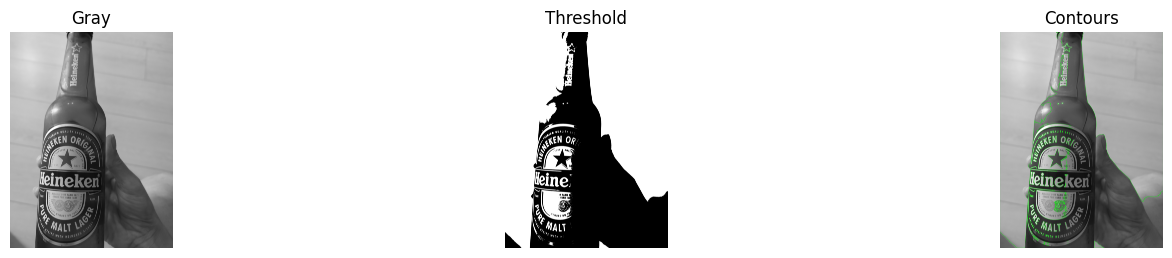

name: IMG_20231101_154044.jpg: 551 اشیا


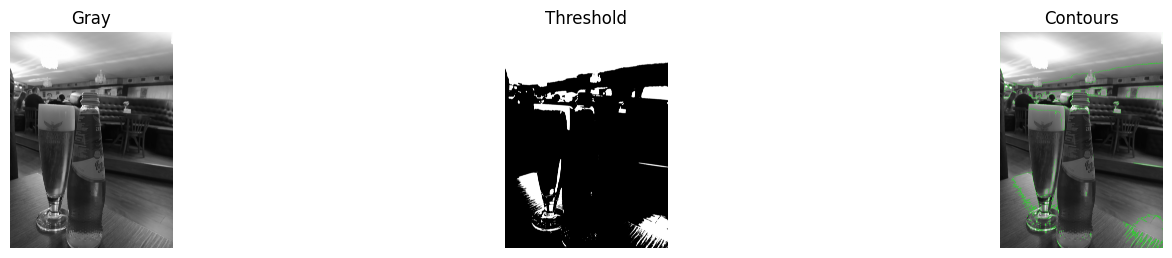

name: IMG_20231103_221629.jpg: 877 اشیا


In [4]:
from google.colab import files

# تابع یکبار (بالای نوت‌بوک)

def show_grid(images, titles, rows, cols, cmaps=None):
    """Helper function to display a grid of images"""
    fig = plt.figure(figsize=(15, 5))
    for i, image in enumerate(images):
        ax = fig.add_subplot(rows, cols, i + 1)
        if cmaps and cmaps[i]:
            ax.imshow(image, cmap=cmaps[i])
        else:
            ax.imshow(image)
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def contour_pipeline(filename):
    """کانتور کامل یک فایل"""
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_color = cv2.cvtColor(gray.copy(), cv2.COLOR_GRAY2BGR)
    cv2.drawContours(img_color, contours, -1, (0, 255, 0), 2)

    images = [gray, thresh, img_color]
    titles = ['Gray', 'Threshold', 'Contours']
    cmaps = ['gray', 'gray', None]
    show_grid(images, titles, rows=2, cols=3, cmaps=cmaps)

    print(f"name: {filename}: {len(contours)} اشیا")
    return contours

#
uploaded = files.upload()
filenames = list(uploaded.keys())
for filename in filenames:
    contour_pipeline(filename)  # فقط ۱ خط!

In [ ]:
#(ازین استفاده نشود بهتر است به دلیل شلوغی زیاد ) کد خام بدون نوشتن تابع برای خواندن چند عکس
uploaded = files.upload()
filenames = list(uploaded.keys())  # همه فایل‌ها!

for filename in filenames:  # حلقه روی هر فایل
    print(f"🔄 {filename}")
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_color = cv2.cvtColor(gray.copy(), cv2.COLOR_GRAY2BGR)
    cv2.drawContours(img_color, contours, -1, (0, 255, 0), 2)

    # نمایش (همه کد تکراری!)
    images = [gray, thresh, img_color]
    titles = ['Gray', 'Threshold', 'Contours']
    cmaps = ['gray', 'gray', None]
    show_grid(images, titles, rows=1, cols=3, cmaps=cmaps)

    print(f"🔢 اشیا: {len(contours)}")
